In [4]:
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

from gameplan.growth import growth_series as gp_gs


In [2]:
# df = pd.read_excel("lifecycle_earnings_moments.xlsx", sheet_name='L1_log_year')

In [3]:
# df.head()

## Data Sources
1. Columns - income percentile (or relevant lookup?) (int)
2. Index - Age in days (int)
3. Data - Cumulative growth at a given point in time

In [536]:
# def get_kitces_growth_curves():
#     growth_curves = pd.read_csv('gameplan/growth/raw_data/Income Growth - To upload.csv')
#     growth_curves['age_days'] = growth_curves.age.apply(lambda x: pd.Timedelta(x, 'Y').days)
#     growth_curves.drop(columns=['age_bucket', 'age'], inplace=True)
#     growth_curves.set_index('age_days', inplace=True)
#     growth_curves.columns = [int(x) for x in growth_curves.columns]
#     return growth_curves

In [537]:
# kgc = get_kitces_growth_curves()

In [5]:
import pandas as pd

from gameplan.growth.growth_models import KitcesIncomeGrowthModel
from gameplan.user import User

from gameplan.income_streams import Salary

/Users/davidbrodsky/repos/gameplan/gameplan/growth/data_sources.py:12: FutureWarning:

M and Y units are deprecated and will be removed in a future version.



In [10]:
user = User(email='db@gmail.com', birthday=pd.datetime(1990, 9, 11), income_percentile=90)

In [ ]:
AGE: 

In [14]:
sal_grwth_points = user.get_growth_points_to_fit(
    growth_model=KitcesIncomeGrowthModel, 
    start_dt=pd.datetime(2019, 12, 31)
)

In [15]:
s = Salary(
    180000/26, 
    payday_freq='2W-Fri', 
    growth_points_to_fit=sal_grwth_points, 
    last_paycheck_dt=pd.datetime(2055, 9, 11), 
    tax_rate=.35
)

In [19]:
px.line(s.cash_flows_df.resample('52W', closed='left').sum().reset_index(), 'index', 'salary')

# IPUMS 

In [577]:
import untangle

In [578]:
url = "gameplan/growth/raw_data/data_labels.xml"
def get_data_labels(url):
    obj = untangle.parse(url)
    data = obj.codeBook.dataDscr.var
    labels = {
        x['ID']: {
            int(el.catValu.cdata): el.labl.cdata 
            for el in x.catgry
        }  
        for x in data
        if getattr(x, 'catgry', None)
    }
    return labels

DATA_LABELS = get_data_labels(url)

In [579]:
ipums = pd.read_csv("gameplan/growth/raw_data/asec_data.csv")

In [580]:
for k, v in DATA_LABELS.items():
    ipums[k.lower()] = ipums[k].replace(v)

In [581]:
subset = ipums.query("AGE.between(22, 65) & WKSWORK1 >= 40 & fullpart == 'Full-time'")

In [582]:
subset.classwly.value_counts()

Wage/salary, private               47718
Local government employee           4241
State government employee           3427
Self-employed, not incorporated     2923
Federal government employee         2599
Self-employed, incorporated         2155
Unpaid family worker                  13
Name: classwly, dtype: int64

In [583]:
subset.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,STATEFIP,METRO,METAREA,COUNTY,STATECENSUS,CBSASZ,METFIPS,INDIVIDCC,PERNUM,CPSIDP,ASECWT,AGE,SEX,OCCLY,INDLY,CLASSWLY,WORKLY,WKSWORK1,WKSWORK2,FULLPART,INCTOT,INCWAGE,month,asecflag,region,statefip,metro,metarea,statecensus,cbsasz,age,sex,classwly,workly,wkswork2,fullpart
2,2019,7,3,20190302846800,1,1209.17,11,23,1,9998,0,11,0,99998,0,1,20190302846801,1209.17,61,2,4020,8660,22,2,52,6,1,12000,12000,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,61,Female,"Wage/salary, private",Yes,50-52 weeks,Full-time
6,2019,15,3,20190202831700,1,1583.31,11,23,1,9998,0,11,0,99998,0,1,20190202831701,1583.31,53,2,4840,6290,22,2,52,6,1,55000,55000,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,53,Female,"Wage/salary, private",Yes,50-52 weeks,Full-time
8,2019,18,3,20171202868100,1,980.57,11,23,1,9998,0,11,0,99998,0,2,20171202868102,980.57,62,1,5240,9380,25,2,40,4,1,50020,50002,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,62,Male,Federal government employee,Yes,40-47 weeks,Full-time
10,2019,21,3,20180102883800,1,1502.27,11,23,1,9998,0,11,0,99998,0,1,20180102883801,1502.27,54,1,6420,770,13,2,52,6,1,45000,0,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,54,Male,"Self-employed, not incorporated",Yes,50-52 weeks,Full-time
11,2019,26,3,20181202843500,1,945.94,11,23,1,9998,0,11,0,99998,0,1,20181202843501,945.94,63,1,9120,7860,28,2,52,6,1,46892,38000,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,63,Male,Local government employee,Yes,50-52 weeks,Full-time


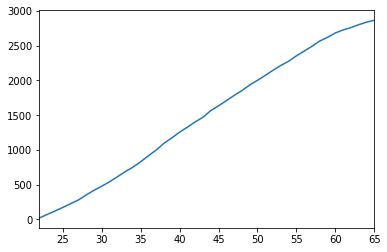

In [447]:
subset.query("metarea.str.contains('New York')").AGE.value_counts(normalize=False).sort_index().cumsum().plot()

In [448]:
nyc = subset.query("metarea.str.contains('New York')")

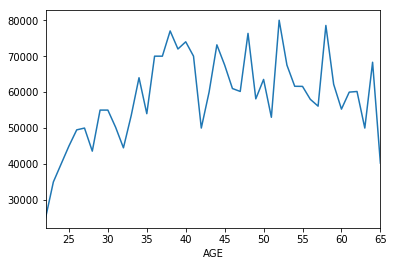

In [454]:
nyc.groupby('AGE')['INCTOT'].median().plot()

In [495]:
PERCENTILES = (
#     list(np.arange(0, 1, .05))
    [0.25, .5, .75, .9, .95]
    + [0.96, 0.97, 0.98, 0.99]
)
to_plt = (
    subset
    .query("metarea.str.contains('Philadelphia')")
    .groupby(['AGE'])
    ['INCTOT']
    .describe(percentiles=PERCENTILES)
    .rolling(3)
    .mean()
    .stack()
    .reset_index()
)

In [586]:
subset.metarea.value_counts()

NIU, household not in a metropolitan area             9963
Missing data                                          3426
New York-Northern New Jersey-Long Island, NY-NJ-PA    2867
Los Angeles-Long Beach-Anaheim, CA                    2332
Washington, DC/MD/VA                                  2164
Chicago-Naperville-Joliet, IL-IN-WI                   1418
Boston-Cambridge-Newton, MA-NH                        1205
Dallas-Fort Worth-Arlington, TX                       1095
Philadelphia-Camden-Wilmington, PA/NJ/DE              1033
Miami-Fort Lauderdale-Miami Beach, FL                  989
Houston-Baytown-Sugar Land, TX                         969
Atlanta-Sandy Springs-Marietta, GA                     869
San Francisco-Oakland-Fremont, CA                      823
Seattle-Tacoma-Bellevue, WA                            746
Urban Honolulu, HI                                     715
Riverside-San Bernadino, CA                            708
Phoenix-Mesa-Scottsdale, AZ                            6

In [584]:
subset.groupby('METAREA')

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,STATEFIP,METRO,METAREA,COUNTY,STATECENSUS,CBSASZ,METFIPS,INDIVIDCC,PERNUM,CPSIDP,ASECWT,AGE,SEX,OCCLY,INDLY,CLASSWLY,WORKLY,WKSWORK1,WKSWORK2,FULLPART,INCTOT,INCWAGE,month,asecflag,region,statefip,metro,metarea,statecensus,cbsasz,age,sex,classwly,workly,wkswork2,fullpart
2,2019,7,3,20190302846800,1,1209.17,11,23,1,9998,0,11,0,99998,0,1,20190302846801,1209.17,61,2,4020,8660,22,2,52,6,1,12000,12000,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,61,Female,"Wage/salary, private",Yes,50-52 weeks,Full-time
6,2019,15,3,20190202831700,1,1583.31,11,23,1,9998,0,11,0,99998,0,1,20190202831701,1583.31,53,2,4840,6290,22,2,52,6,1,55000,55000,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,53,Female,"Wage/salary, private",Yes,50-52 weeks,Full-time
8,2019,18,3,20171202868100,1,980.57,11,23,1,9998,0,11,0,99998,0,2,20171202868102,980.57,62,1,5240,9380,25,2,40,4,1,50020,50002,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,62,Male,Federal government employee,Yes,40-47 weeks,Full-time
10,2019,21,3,20180102883800,1,1502.27,11,23,1,9998,0,11,0,99998,0,1,20180102883801,1502.27,54,1,6420,770,13,2,52,6,1,45000,0,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,54,Male,"Self-employed, not incorporated",Yes,50-52 weeks,Full-time
11,2019,26,3,20181202843500,1,945.94,11,23,1,9998,0,11,0,99998,0,1,20181202843501,945.94,63,1,9120,7860,28,2,52,6,1,46892,38000,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,63,Male,Local government employee,Yes,50-52 weeks,Full-time


In [526]:
age = 32
mta = 'New York'
salary = 350000

In [523]:
import plotly.graph_objects as go

In [524]:
import scipy.stats as sp
sp.percentileofscore(to_plt.INCTOT, salary)

98.41269841269842

In [512]:
to_plt = subset[
    subset['AGE'].between(age - 2, age + 2) 
    & subset['metarea'].str.contains(mta)
]
fig = px.histogram(to_plt, x='INCTOT')
# fig.add_shape(
#         # Line Vertical
#         go.layout.Shape(
#             type="line",
#             x0=salary,
#             y0=0,
#             x1=salary,
#             y1=to_plt.INCTOT.max(),
#             line=dict(
#                 color="RoyalBlue",
#                 width=3
#             )
# ))
fig['layout']['shapes'] = [*fig['layout']['shapes'], {
        'type': 'line',
        'xref': 'x1',
        'yref': 'paper',
        'x0': salary,
        'y0': 0,
        'x1': salary,
        'y1': to_plt.INCTOT.max(),
        'line': {
            'color': 'black',
            'width': 1,
            'dash': 'dashdot',
        },
    }]
fig.show()

In [506]:
fig.add_annotation(x=salary)
fig.add_shape(
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=salary,
            y0=0,
            x1=salary,
            y1=to_plt.INCTOT.max(),
            line=dict(
                color="RoyalBlue",
                width=3
            )
))

In [496]:
px.line(to_plt.query('level_1 != "count"') , x='AGE', y=0, color='level_1')

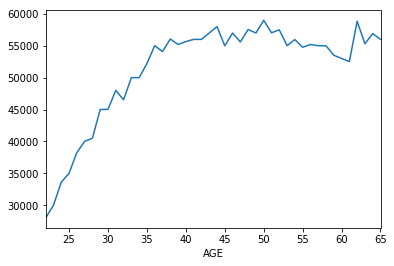

In [449]:
subset.groupby('AGE')['INCTOT'].median().plot()

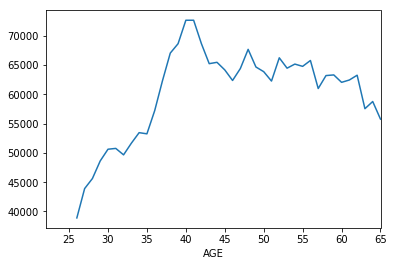

In [451]:
nyc.groupby('AGE')['INCTOT'].median().rolling(5).mean().plot()

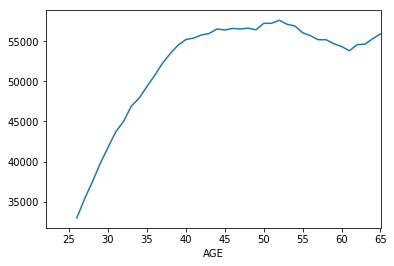

In [450]:
subset.groupby('AGE')['INCTOT'].median().rolling(5).mean().plot()

In [436]:
subset.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,STATEFIP,METRO,METAREA,COUNTY,STATECENSUS,CBSASZ,METFIPS,INDIVIDCC,PERNUM,CPSIDP,ASECWT,AGE,SEX,OCCLY,INDLY,CLASSWLY,WORKLY,WKSWORK1,WKSWORK2,FULLPART,INCTOT,INCWAGE,month,asecflag,region,statefip,metro,metarea,statecensus,cbsasz,age,sex,classwly,workly,wkswork2,fullpart
6,2019,15,3,20190202831700,1,1583.31,11,23,1,9998,0,11,0,99998,0,1,20190202831701,1583.31,53,2,4840,6290,22,2,52,6,1,55000,55000,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,53,Female,"Wage/salary, private",Yes,50-52 weeks,Full-time
10,2019,21,3,20180102883800,1,1502.27,11,23,1,9998,0,11,0,99998,0,1,20180102883801,1502.27,54,1,6420,770,13,2,52,6,1,45000,0,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,54,Male,"Self-employed, not incorporated",Yes,50-52 weeks,Full-time
14,2019,27,3,20181202835000,1,934.86,11,23,1,9998,0,11,0,99998,0,2,20181202835002,934.86,43,1,3850,9590,25,2,52,6,1,100012,100000,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,43,Male,Federal government employee,Yes,50-52 weeks,Full-time
19,2019,30,3,20171202870100,1,726.60,11,23,1,9998,0,11,0,99998,0,2,20171202870102,726.60,33,1,6220,770,13,2,52,6,1,50000,0,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,33,Male,"Self-employed, not incorporated",Yes,50-52 weeks,Full-time
30,2019,32,3,20190102823900,1,1570.74,11,23,1,9998,0,11,0,99998,0,1,20190102823901,1570.74,58,2,630,770,22,2,52,6,1,32636,32621,March,ASEC,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",Maine,Not identified or nonmetropolitan,58,Female,"Wage/salary, private",Yes,50-52 weeks,Full-time


In [374]:
# blah = (tmp[pd.to_numeric(tmp.AGE).between(24, 60)].groupby(["METAREA", 'SEX'])['INCWAGE'].describe().sort_values('count', ascending=False).reset_index())

In [378]:
blah.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,STATEFIP,METRO,METAREA,COUNTY,STATECENSUS,CBSASZ,METFIPS,INDIVIDCC,PERNUM,CPSIDP,ASECWT,AGE,SEX,INCTOT,INCWAGE
849746,2019,8,March,20190302822300,ASEC,1146.23,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",0,Maine,Not identified or nonmetropolitan,99998,0,2,20190302822302,1480.79,37,Male,12000.0,12000.0
849748,2019,15,March,20190202831700,ASEC,1583.31,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",0,Maine,Not identified or nonmetropolitan,99998,0,1,20190202831701,1583.31,53,Female,55000.0,55000.0
849752,2019,21,March,20180102883800,ASEC,1502.27,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",0,Maine,Not identified or nonmetropolitan,99998,0,1,20180102883801,1502.27,54,Male,45000.0,0.0
849755,2019,27,March,20181202835000,ASEC,934.86,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",0,Maine,Not identified or nonmetropolitan,99998,0,1,20181202835001,934.86,46,Female,0.0,0.0
849756,2019,27,March,20181202835000,ASEC,934.86,New England Division,Maine,Not in metro area,"NIU, household not in a metropolitan area",0,Maine,Not identified or nonmetropolitan,99998,0,2,20181202835002,934.86,43,Male,100012.0,100000.0


In [379]:
px.histogram(blah, x='INCWAGE', color='AGE')

In [346]:
tmp.groupby(["METAREA", 'SEX'])['INCWAGE'].describe().sort_values('count', ascending=False)

count  \
METAREA                                            SEX               
NIU, household not in a metropolitan area          Female  15952.0   
                                                   Male    15429.0   
Missing data                                       Female   5290.0   
                                                   Male     5064.0   
New York-Northern New Jersey-Long Island, NY-NJ-PA Female   4146.0   
                                                   Male     3778.0   
Los Angeles-Long Beach-Anaheim, CA                 Female   3366.0   
                                                   Male     3207.0   
Washington, DC/MD/VA                               Female   2603.0   
                                                   Male     2309.0   
Chicago-Naperville-Joliet, IL-IN-WI                Female   1943.0   
                                                   Male     1900.0   
Boston-Cambridge-Newton, MA-NH                     Female   1595.0   
                                                   Male     1537.0   
Philadelphia-Camden-Wilmington, PA/NJ/DE           Female   1520.0   
Dallas-Fort Worth-Arlington, TX                    Female   1513.0   
Philadelphia-Camden-Wilmington, PA/NJ/DE           Male     1412.0   
Dallas-Fort Worth-Arlington, TX                    Male     1394.0   
Houston-Baytown-Sugar Land, TX                     Female   1377.0   
Miami-Fort Lauderdale-Miami Beach, FL              Female   1355.0   
Houston-Baytown-Sugar Land, TX                     Male     1310.0   
Miami-Fort Lauderdale-Miami Beach, FL              Male     1248.0   
521                                                Female   1219.0   
                                                   Male     1103.0   
Riverside-San Bernadino, CA                        Female   1093.0   
Urban Honolulu, HI                                 Female   1080.0   
San Francisco-Oakland-Fremont, CA                  Female   1050.0   
Urban Honolulu, HI                                 Male     1017.0   
Other metropolitan areas, unidentified             Female   1013.0   
Phoenix-Mesa-Scottsdale, AZ                        Male     1010.0   
...                                                            ...   
Champaign-Urbana, IL                               Female     40.0   
Lafayette-West Lafayette, IN                       Male       39.0   
Waco, TX                                           Female     38.0   
Johnson City, TN                                   Male       37.0   
Bloomington, IL                                    Male       37.0   
Johnstown, PA                                      Female     35.0   
Blacksburg-Christiansburg-Radford, VA              Female     35.0   
871                                                Female     34.0   
Carbondale-Marion, IL                              Male       34.0   
Wichita Falls, TX                                  Female     34.0   
Bloomington, IN                                    Female     34.0   
San Luis Obispo-Paso Robles, CA                    Male       33.0   
Blacksburg-Christiansburg-Radford, VA              Male       33.0   
Odessa, TX                                         Female     32.0   
Panama City-Lynn Haven, FL                         Male       32.0   
                                                   Female     31.0   
Saginaw-Saginaw Township North, MI                 Male       31.0   
501                                                Male       30.0   
Janvesville, WI                                    Female     29.0   
871                                                Male       28.0   
Wausau, WI                                         Male       27.0   
                                                   Female     26.0   
741                                                Female     26.0   
Janvesville, WI                                    Male       26.0   
Carbondale-Marion, IL                              Female     26.0   
7

### Scratchwork

In [326]:
tmp.keys()

dict_keys(['MONTH', 'ASECFLAG', 'REGION', 'STATEFIP', 'METRO', 'METAREA', 'STATECENSUS', 'CBSASZ', 'AGE', 'SEX'])

In [331]:
tmp['REGION']

{'11': 'New England Division',
 '12': 'Middle Atlantic Division',
 '21': 'East North Central Division',
 '22': 'West North Central Division',
 '31': 'South Atlantic Division',
 '32': 'East South Central Division',
 '33': 'West South Central Division',
 '41': 'Mountain Division',
 '42': 'Pacific Division',
 '97': 'State not identified'}

In [318]:
tmp['COUNTY'].catgry

AttributeError: 'var' has no attribute 'catgry'

In [291]:
e = tmp['METAREA']

In [296]:
{y.catValu.cdata: y.labl.cdata for y in e.catgry}

{'0060': 'Abilene, TX',
 '0080': 'Akron, OH',
 '0120': 'Albany, GA',
 '0160': 'Albany-Schenectady-Troy, NY',
 '0200': 'Albuquerque, NM',
 '0240': 'Allentown-Bethlehem-Easton, PA/NJ',
 '0280': 'Altoona, PA MSA',
 '0320': 'Amarillo, TX',
 '0380': 'Anchorage, AK',
 '0400': 'Anderson, IN',
 '0440': 'Ann Arbor, MI',
 '0450': 'Anniston, AL',
 '0451': 'Anniston-Oxford, AL',
 '0460': 'Appleton,Oshkosh-Neenah, WI',
 '0461': 'Appleton, WI',
 '0462': 'Oshkosh-Neenah, WI',
 '0480': 'Asheville, NC',
 '0500': 'Athens, GA',
 '0501': 'Athens-Clark County, GA',
 '0520': 'Atlanta, GA',
 '0521': 'Atlanta-Sandy Springs-Marietta, GA',
 '0560': 'Atlantic City, NJ',
 '0580': 'Auburn-Opelika, AL',
 '0600': 'Augusta-Aiken, GA-SC',
 '0601': 'Augusta-Richmond County, GA-SC',
 '0640': 'Austin, TX',
 '0641': 'Austin-Round Rock, TX',
 '0680': 'Bakersfield, CA',
 '0720': 'Baltimore, MD',
 '0721': 'Baltimore-Towson, MD',
 '0722': 'Baltimore-Towson-Columbia, MD',
 '0730': 'Bangor, ME',
 '0740': 'Barnstable-Yarmouth, M

In [278]:
blah.catgry[0].catValu.cdata

'0060'

In [279]:
{blah.catgry[0].catValu.cdata: blah.catgry[0].labl.cdata}

{'0060': 'Abilene, TX'}

In [272]:
[x._attributes['ID'] for x in obj.codeBook.dataDscr.var]

['YEAR',
 'SERIAL',
 'MONTH',
 'CPSID',
 'ASECFLAG',
 'ASECWTH',
 'REGION',
 'STATEFIP',
 'METRO',
 'METAREA',
 'COUNTY',
 'STATECENSUS',
 'CBSASZ',
 'METFIPS',
 'INDIVIDCC',
 'PERNUM',
 'CPSIDP',
 'ASECWT',
 'AGE',
 'SEX',
 'INCTOT',
 'INCWAGE']

In [258]:
blah.__dict__

{'_name': 'var',
 '_attributes': {'ID': 'YEAR',
  'files': 'ExtractData',
  'name': 'YEAR',
  'intrvl': 'contin',
  'dcml': '0'},
 'children': [Element(name = location, attributes = {'StartPos': '1', 'width': '4', 'EndPos': '4'}, cdata = ),
  Element(name = labl, attributes = {}, cdata = Survey year),
  Element(name = txt, attributes = {}, cdata = YEAR reports the year in which the survey was conducted.  YEARP is repeated on person records.),
  Element(name = codInstr, attributes = {}, cdata = 
  YEAR is a 4-digit numeric value.),
  Element(name = concept, attributes = {'vocab': 'IPUMS'}, cdata = Technical Variables -- HOUSEHOLD),
  Element(name = varFormat, attributes = {'schema': 'other', 'type': 'numeric'}, cdata = )],
 'is_root': False,
 'cdata': '\n      \n      \n      \n      \n      \n      \n    ',
 'codInstr': Element(name = codInstr, attributes = {}, cdata = 
 YEAR is a 4-digit numeric value.),
 'concept': Element(name = concept, attributes = {'vocab': 'IPUMS'}, cdata = Tech

In [237]:
xml = "gameplan/growth/raw_data/data_labels.xml"

In [239]:
%%bash
pip install untangle

  Running setup.py install for untangle: started
    Running setup.py install for untangle: finished with status 'done'


You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [64]:
{elem.tag: elem.attrib for elem in blah.iter()}

AttributeError: '_elementtree._element_iterator' object has no attribute 'iter'

In [75]:
a = root.iter()

In [232]:
for x in root.findall('./{ddi:codebook:2_5}dataDscr/{ddi:codebook:2_5}var/{ddi:codebook:2_5}catgry/'):
    print(f"tag: {x.tag}")
    print(f"text: {x.text}")
    print(f"attrib: {x.text}")
    print(f"items: {x.items()}")
    print(f"itertext: {list(x.itertext())}")
    print(f"keys: {x.keys()}")
    print(f"tail: {x.tail}")
    print()
#     print(list(x))
#     print(x.get('{ddi:codebook:2_5}catValu').text)
#     print(f"children: {x._children}")
    
#     print([ for k,v in x.iter()])
    

tag: {ddi:codebook:2_5}catValu
text: 01
attrib: 01
items: []
itertext: ['01']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: January
attrib: January
items: []
itertext: ['January']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 02
attrib: 02
items: []
itertext: ['02']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: February
attrib: February
items: []
itertext: ['February']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 03
attrib: 03
items: []
itertext: ['03']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: March
attrib: March
items: []
itertext: ['March']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 04
attrib: 04
items: []
itertext: ['04']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: April
attrib: April
items: []
itertext: ['April']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 05
attrib: 05
items: []
itertext: ['05']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text:

      

tag: {ddi:codebook:2_5}catValu
text: 89
attrib: 89
items: []
itertext: ['89']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Montana-Wyoming-Colorado-New Mexico-Utah-Nevada-Arizona
attrib: Montana-Wyoming-Colorado-New Mexico-Utah-Nevada-Arizona
items: []
itertext: ['Montana-Wyoming-Colorado-New Mexico-Utah-Nevada-Arizona']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 90
attrib: 90
items: []
itertext: ['90']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Delaware-Maryland-Virginia-West Virginia
attrib: Delaware-Maryland-Virginia-West Virginia
items: []
itertext: ['Delaware-Maryland-Virginia-West Virginia']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 99
attrib: 99
items: []
itertext: ['99']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: State not identified
attrib: State not identified
items: []
itertext: ['State not identified']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 0
attrib: 0
items: 

tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 1605
attrib: 1605
items: []
itertext: ['1605']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Chicago-Naperville-Joliet, IL-IN-WI
attrib: Chicago-Naperville-Joliet, IL-IN-WI
items: []
itertext: ['Chicago-Naperville-Joliet, IL-IN-WI']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 1620
attrib: 1620
items: []
itertext: ['1620']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Chico,CA
attrib: Chico,CA
items: []
itertext: ['Chico,CA']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 1640
attrib: 1640
items: []
itertext: ['1640']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Cincinnati-Hamilton,OH/KY/IN
attrib: Cincinnati-Hamilton,OH/KY/IN
items: []
itertext: ['Cincinnati-Hamilton,OH/KY/IN']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 1641
attrib: 1641
items: []
itertext: ['1641']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Cincinnati-Middleto

keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 3284
attrib: 3284
items: []
itertext: ['3284']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Hartford-West Hartford-East Hartford, CT
attrib: Hartford-West Hartford-East Hartford, CT
items: []
itertext: ['Hartford-West Hartford-East Hartford, CT']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 3285
attrib: 3285
items: []
itertext: ['3285']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Hartford, CT
attrib: Hartford, CT
items: []
itertext: ['Hartford, CT']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 3290
attrib: 3290
items: []
itertext: ['3290']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Hickory-Morganton, NC
attrib: Hickory-Morganton, NC
items: []
itertext: ['Hickory-Morganton, NC']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 3291
attrib: 3291
items: []
itertext: ['3291']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Hick

tag: {ddi:codebook:2_5}labl
text: Los Angeles-Long Beach-Anaheim, CA
attrib: Los Angeles-Long Beach-Anaheim, CA
items: []
itertext: ['Los Angeles-Long Beach-Anaheim, CA']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 4520
attrib: 4520
items: []
itertext: ['4520']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Louisville, KY/IN
attrib: Louisville, KY/IN
items: []
itertext: ['Louisville, KY/IN']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 4600
attrib: 4600
items: []
itertext: ['4600']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Lubbock, TX
attrib: Lubbock, TX
items: []
itertext: ['Lubbock, TX']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 4640
attrib: 4640
items: []
itertext: ['4640']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Lynchburg, VA
attrib: Lynchburg, VA
items: []
itertext: ['Lynchburg, VA']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 4680
attrib: 4680
items: []
itertext

attrib: 5800
items: []
itertext: ['5800']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Odessa, TX
attrib: Odessa, TX
items: []
itertext: ['Odessa, TX']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 5801
attrib: 5801
items: []
itertext: ['5801']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Midland, TX
attrib: Midland, TX
items: []
itertext: ['Midland, TX']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 5840
attrib: 5840
items: []
itertext: ['5840']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Ocean City, NJ
attrib: Ocean City, NJ
items: []
itertext: ['Ocean City, NJ']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 5880
attrib: 5880
items: []
itertext: ['5880']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Oklahoma City, OK
attrib: Oklahoma City, OK
items: []
itertext: ['Oklahoma City, OK']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 5910
attrib: 5910
items: []
itertext:

text: 7840
attrib: 7840
items: []
itertext: ['7840']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Spokane, WA
attrib: Spokane, WA
items: []
itertext: ['Spokane, WA']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 7880
attrib: 7880
items: []
itertext: ['7880']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Springfield, IL
attrib: Springfield, IL
items: []
itertext: ['Springfield, IL']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 7920
attrib: 7920
items: []
itertext: ['7920']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Springfield, MO
attrib: Springfield, MO
items: []
itertext: ['Springfield, MO']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 8000
attrib: 8000
items: []
itertext: ['8000']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Springfield-Holyoke-Chicopee, MA
attrib: Springfield-Holyoke-Chicopee, MA
items: []
itertext: ['Springfield-Holyoke-Chicopee, MA']
keys: []
tail: 
      



text: 73
attrib: 73
items: []
itertext: ['73']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Oklahoma
attrib: Oklahoma
items: []
itertext: ['Oklahoma']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 74
attrib: 74
items: []
itertext: ['74']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Texas
attrib: Texas
items: []
itertext: ['Texas']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 79
attrib: 79
items: []
itertext: ['79']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Arkansas, Louisiana, Oklahoma
attrib: Arkansas, Louisiana, Oklahoma
items: []
itertext: ['Arkansas, Louisiana, Oklahoma']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 81
attrib: 81
items: []
itertext: ['81']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: Montana
attrib: Montana
items: []
itertext: ['Montana']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 82
attrib: 82
items: []
itertext: ['82']
keys: []
tail: 
  

items: []
itertext: ['41']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 42
attrib: 42
items: []
itertext: ['42']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: 42
attrib: 42
items: []
itertext: ['42']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 43
attrib: 43
items: []
itertext: ['43']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: 43
attrib: 43
items: []
itertext: ['43']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 44
attrib: 44
items: []
itertext: ['44']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: 44
attrib: 44
items: []
itertext: ['44']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 45
attrib: 45
items: []
itertext: ['45']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: 45
attrib: 45
items: []
itertext: ['45']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 46
attrib: 46
items: []
itertext: ['46']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text:

items: []
itertext: ['83']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 84
attrib: 84
items: []
itertext: ['84']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: 84
attrib: 84
items: []
itertext: ['84']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 85
attrib: 85
items: []
itertext: ['85']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: 85
attrib: 85
items: []
itertext: ['85']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 86
attrib: 86
items: []
itertext: ['86']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: 86
attrib: 86
items: []
itertext: ['86']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 87
attrib: 87
items: []
itertext: ['87']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text: 87
attrib: 87
items: []
itertext: ['87']
keys: []
tail: 
      

tag: {ddi:codebook:2_5}catValu
text: 88
attrib: 88
items: []
itertext: ['88']
keys: []
tail: 
        

tag: {ddi:codebook:2_5}labl
text:

In [135]:
for x in root.findall('{ddi:codebook:2_5}dataDscr/catgry'):
#     print([n.tag for n in x.iter() if 'var' in n.tag])
    print(x.get('ID'))
#     print({n.tag:n.attrib for n in x.iter()})
    print()
   

In [85]:
{k.tag: [a.tag for a in k.iter()] for k in root.iter()}

{'{ddi:codebook:2_5}codeBook': ['{ddi:codebook:2_5}codeBook',
  '{ddi:codebook:2_5}docDscr',
  '{ddi:codebook:2_5}citation',
  '{ddi:codebook:2_5}titlStmt',
  '{ddi:codebook:2_5}titl',
  '{ddi:codebook:2_5}subTitl',
  '{ddi:codebook:2_5}IDNo',
  '{ddi:codebook:2_5}rspStmt',
  '{ddi:codebook:2_5}AuthEnty',
  '{ddi:codebook:2_5}prodStmt',
  '{ddi:codebook:2_5}producer',
  '{ddi:codebook:2_5}prodDate',
  '{ddi:codebook:2_5}prodPlac',
  '{ddi:codebook:2_5}distStmt',
  '{ddi:codebook:2_5}contact',
  '{ddi:codebook:2_5}stdyDscr',
  '{ddi:codebook:2_5}citation',
  '{ddi:codebook:2_5}titlStmt',
  '{ddi:codebook:2_5}titl',
  '{ddi:codebook:2_5}rspStmt',
  '{ddi:codebook:2_5}AuthEnty',
  '{ddi:codebook:2_5}prodStmt',
  '{ddi:codebook:2_5}producer',
  '{ddi:codebook:2_5}prodDate',
  '{ddi:codebook:2_5}prodPlac',
  '{ddi:codebook:2_5}distStmt',
  '{ddi:codebook:2_5}contact',
  '{ddi:codebook:2_5}serStmt',
  '{ddi:codebook:2_5}serName',
  '{ddi:codebook:2_5}serInfo',
  '{ddi:codebook:2_5}verStmt',


In [53]:
{elem.tag: elem.attrib for elem in root.iter()}

{'{ddi:codebook:2_5}codeBook': {'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'ddi:codebook:2_5 http://www.ddialliance.org/Specification/DDI-Codebook/2.5/XMLSchema/codebook.xsd',
  'version': '2.5',
  'ID': 'ddi2-153500_cps_00004.dat-cps.ipums.org'},
 '{ddi:codebook:2_5}docDscr': {},
 '{ddi:codebook:2_5}citation': {},
 '{ddi:codebook:2_5}titlStmt': {},
 '{ddi:codebook:2_5}titl': {},
 '{ddi:codebook:2_5}subTitl': {},
 '{ddi:codebook:2_5}IDNo': {},
 '{ddi:codebook:2_5}rspStmt': {},
 '{ddi:codebook:2_5}AuthEnty': {'affiliation': 'University of Minnesota'},
 '{ddi:codebook:2_5}prodStmt': {},
 '{ddi:codebook:2_5}producer': {'abbr': 'MPC',
  'affiliation': 'University of Minnesota',
  'role': 'Documentation'},
 '{ddi:codebook:2_5}prodDate': {'date': '2019-12-11'},
 '{ddi:codebook:2_5}prodPlac': {},
 '{ddi:codebook:2_5}distStmt': {},
 '{ddi:codebook:2_5}contact': {'affiliation': 'Minnesota Population Center',
  'URI': 'http://cps.ipums.org/'},
 '{ddi:codebook:2_5}stdyDscr': {},

In [60]:
blah = root.iter("{ddi:codebook:2_5}dataDscr")

In [61]:
blah)

[<Element '{ddi:codebook:2_5}dataDscr' at 0x11591e638>]

In [26]:
print(ET.tostring(root, encoding='utf8').decode('utf8'))

<?xml version='1.0' encoding='utf8'?>
<ns0:codeBook xmlns:ns0="ddi:codebook:2_5" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" ID="ddi2-153500_cps_00004.dat-cps.ipums.org" version="2.5" xsi:schemaLocation="ddi:codebook:2_5 http://www.ddialliance.org/Specification/DDI-Codebook/2.5/XMLSchema/codebook.xsd">
  <ns0:docDscr>
    <ns0:citation>
      <ns0:titlStmt>
        <ns0:titl>Codebook for an IPUMS-CPS Data Extract</ns0:titl>
        <ns0:subTitl>DDI 2.5 metadata describing the extract file  'cps_00004.dat'</ns0:subTitl>
        <ns0:IDNo>ddi2-153500_cps_00004.dat-cps.ipums.org</ns0:IDNo>
      </ns0:titlStmt>
      <ns0:rspStmt>
        <ns0:AuthEnty affiliation="University of Minnesota">Minnesota Population Center</ns0:AuthEnty>
      </ns0:rspStmt>
      <ns0:prodStmt>
        <ns0:producer abbr="MPC" affiliation="University of Minnesota" role="Documentation">Minnesota Population Center</ns0:producer>
        <ns0:prodDate date="2019-12-11">December 11, 2019</ns0:prodDate>
 

In [29]:
for movie in root.iter('catgry'):
    print(movie.tag)

[['{http://www.w3.org/2001/XMLSchema-instance}schemaLocation',
  'ddi:codebook:2_5 http://www.ddialliance.org/Specification/DDI-Codebook/2.5/XMLSchema/codebook.xsd'],
 ['version', '2.5'],
 ['ID', 'ddi2-153500_cps_00004.dat-cps.ipums.org']]

In [51]:
usa = pd.read_csv("gameplan/growth/raw_data/usa_00003.csv")

In [53]:
usa.SERIAL.value_counts()

1944880    7
6476314    6
837155     5
622388     4
4435820    4
5327567    4
1929051    3
1560708    3
1347504    3
587127     3
2577904    3
2241022    3
6487752    3
3420150    3
699741     3
1337648    3
948573     3
3490594    3
6104058    3
3840650    3
5979668    3
3189231    3
5154750    3
4551535    3
2054142    3
2978976    3
6027259    3
4921688    3
2616561    3
573433     3
          ..
5887891    1
5365650    1
569276     1
6338495    1
2797564    1
3887040    1
2263033    1
3837944    1
3336181    1
43438      1
5431282    1
4863983    1
147438     1
5380075    1
4329448    1
1730533    1
1208292    1
5396451    1
1728482    1
2655609    1
2531114    1
1290204    1
3905499    1
3921875    1
2869201    1
6149409    1
1257420    1
6406162    1
1957152    1
1048576    1
Name: SERIAL, Length: 227093, dtype: int64

In [47]:
new_ipums.METFIPS.value_counts()

99998    43711
35620     7924
31080     6573
47900     4912
16980     3843
14460     3132
37980     2932
19100     2907
26420     2687
33100     2603
12060     2322
46520     2097
40140     2079
41860     2016
38060     2004
29820     1866
39300     1843
42660     1821
19820     1701
10740     1621
38900     1521
33460     1490
41740     1440
14260     1324
45300     1310
41620     1233
16740     1228
28140     1162
36540     1126
19740     1106
         ...  
21780       89
15680       89
27740       88
36780       87
21500       87
44100       86
29200       86
27100       84
47580       83
40220       83
31420       83
11540       82
14540       82
14010       81
42020       80
47380       78
27780       75
48660       75
40980       75
36220       73
13980       68
37460       63
35660       62
16060       60
14020       58
27500       55
12020       54
48140       53
12700       51
47220       32
Name: METFIPS, Length: 261, dtype: int64

In [34]:
ipums2.query("UH_CBSA_1.isnull()").dropna(axis=1, how='all')

YEAR            1.000000
SERIAL          1.000000
MONTH           1.000000
HWTFINL         0.903148
CPSID           1.000000
ASECFLAG        0.160366
ASECWTH         0.096852
REGION          1.000000
STATEFIP        1.000000
METRO           1.000000
METAREA         1.000000
COUNTY          1.000000
STATECENSUS     1.000000
CBSASZ          1.000000
METFIPS         1.000000
INDIVIDCC       1.000000
UH_CBSA_1       0.903148
UH_CSAFP_1      0.903148
UH_METSIZE_5    0.903148
UH_REGION_2     0.903148
UH_STFIPS_1     0.903148
PERNUM          1.000000
WTFINL          0.903148
CPSIDP          1.000000
ASECWT          0.096852
AGE             1.000000
SEX             1.000000
INCTOT          0.096852
INCWAGE         0.096852
dtype: float64

In [ ]:
pd.read_

In [15]:
ipums.shape

(180101, 25)

In [16]:
ipums.columns.tolist()

['YEAR',
 'SERIAL',
 'MONTH',
 'CPSID',
 'ASECFLAG',
 'ASECWTH',
 'METRO',
 'METAREA',
 'COUNTY',
 'METFIPS',
 'INDIVIDCC',
 'PERNUM',
 'CPSIDP',
 'ASECWT',
 'AGE',
 'SEX',
 'EMPSTAT',
 'LABFORCE',
 'OCC',
 'OCCLY',
 'INDLY',
 'WKSWORK1',
 'INCTOT',
 'INCWAGE',
 'QMIGRAT1G']

In [17]:
ipums.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,METRO,METAREA,COUNTY,METFIPS,...,SEX,EMPSTAT,LABFORCE,OCC,OCCLY,INDLY,WKSWORK1,INCTOT,INCWAGE,QMIGRAT1G
0,2019,4,3,20180302857800,1,2031.67,1,9998,0,99998,...,1,10,2,4050,4050,8660,52,18000,18000,0
1,2019,6,3,20190302835500,1,1232.04,1,9998,0,99998,...,2,36,1,0,0,0,0,21780,0,0
2,2019,7,3,20190302846800,1,1209.17,1,9998,0,99998,...,2,10,2,4020,4020,8660,52,12000,12000,0
3,2019,8,3,20190302822300,1,1146.23,1,9998,0,99998,...,2,32,1,0,0,0,0,10727,0,0
4,2019,8,3,20190302822300,1,1146.23,1,9998,0,99998,...,1,10,2,4610,4610,8370,52,12000,12000,0


In [24]:
ipums[(ipums.METAREA == 8840) ]

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,METRO,METAREA,COUNTY,METFIPS,INDIVIDCC,PERNUM,CPSIDP,ASECWT,AGE,SEX,EMPSTAT,LABFORCE,OCC,OCCLY,INDLY,WKSWORK1,INCTOT,INCWAGE,QMIGRAT1G
64929,2019,34994,3,20180102996800,1,4653.31,3,8840,0,47900,0,1,20180102996801,4653.31,26,1,10,2,7410,7200,4670,52,55805,50000,0
64930,2019,34994,3,20180102996800,1,4653.31,3,8840,0,47900,0,2,20180102996802,4653.31,26,2,10,2,1006,1240,7380,52,70000,70000,0
64931,2019,34998,3,20180302972000,1,4636.43,3,8840,0,47900,0,1,20180302972001,4636.43,85,1,36,1,0,0,0,0,55456,0,0
64932,2019,35001,3,20190202951300,1,3585.53,3,8840,0,47900,0,1,20190202951301,3585.53,79,2,36,1,0,0,0,0,60980,0,0
64933,2019,35004,3,20181202950300,1,1904.14,3,8840,0,47900,0,1,20181202950301,1904.14,40,2,10,2,4700,4700,4970,52,42000,42000,0
64934,2019,35004,3,20181202950300,1,1904.14,3,8840,0,47900,0,2,20181202950302,1904.14,41,1,10,2,7750,7750,770,52,46000,46000,0
64935,2019,35004,3,20181202950300,1,1904.14,3,8840,0,47900,0,3,20181202950304,2180.18,18,2,34,1,0,0,0,0,0,0,0
64936,2019,35004,3,20181202950300,1,1904.14,3,8840,0,47900,0,4,20181202950303,2180.18,16,2,34,1,0,0,0,0,0,0,0
64937,2019,35005,3,20181202901800,1,5193.64,3,8840,0,47900,0,1,20181202901801,5193.64,71,2,36,1,0,0,0,0,6,0,0
64938,2019,35006,3,20180102990800,1,3544.94,3,8840,0,47900,0,1,20180102990801,3544.94,69,2,36,1,0,0,0,0,29150,0,0


In [25]:
ipums.groupby('METAREA').INCWAGE.describe(percentiles=np.arange(0.1, 1, 0.1)).sort_values('50%', ascending=False)

,count,mean,std,min,10%,20%,30.0%,40%,50%,60%,70%,80%,90%,max
METAREA,,,,,,,,,,,,,,
3790,191.0,2.597098e+06,4.360310e+06,0.0,0.0,0.0,20000.0,36000.0,60000.0,74000.0,100000.0,9999999.0,9999999.0,9999999.0
1010,68.0,3.114310e+06,4.636999e+06,0.0,0.0,0.0,21400.0,39200.0,59500.0,82000.0,9017999.1,9999999.0,9999999.0,9999999.0
8840,4912.0,1.988248e+06,3.936977e+06,0.0,0.0,0.0,12867.8,32000.0,55500.0,80000.0,120000.0,380000.0,9999999.0,9999999.0
2670,115.0,2.550037e+06,4.345266e+06,0.0,0.0,0.0,6240.0,35600.0,51000.0,66400.0,112400.0,9999999.0,9999999.0,9999999.0
5121,1490.0,2.418671e+06,4.241868e+06,0.0,0.0,0.0,18350.0,35500.0,50831.0,75000.0,115881.5,9999999.0,9999999.0,9999999.0
7760,796.0,2.743172e+06,4.431680e+06,0.0,0.0,0.0,18000.0,35000.0,50000.0,69000.0,123500.0,9999999.0,9999999.0,9999999.0
4000,146.0,2.975840e+06,4.554498e+06,0.0,0.0,0.0,10000.0,30000.0,50000.0,97000.0,450000.0,9999999.0,9999999.0,9999999.0
1305,89.0,2.610676e+06,4.386966e+06,0.0,0.0,0.0,3761.2,23400.0,50000.0,79700.0,115800.0,9999999.0,9999999.0,9999999.0
4720,267.0,2.540594e+06,4.325761e+06,0.0,0.0,1070.0,19753.2,32000.0,50000.0,70000.0,109200.0,9999999.0,9999999.0,9999999.0


In [22]:
ipums.groupby('AGE').INCWAGE.describe(percentiles=np.arange(0.1, 1, 0.1))

,count,mean,std,min,10%,20%,30.0%,40%,50%,60%,70%,80%,90%,max
AGE,,,,,,,,,,,,,,
0,1817.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
1,2289.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
2,2405.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
3,2558.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
4,2563.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
5,2538.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
6,2604.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
7,2576.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
8,2704.0,9.999999e+06,0.000000,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0
